# **Topic Influence**

Mean Squared Error: 4.837159635719639


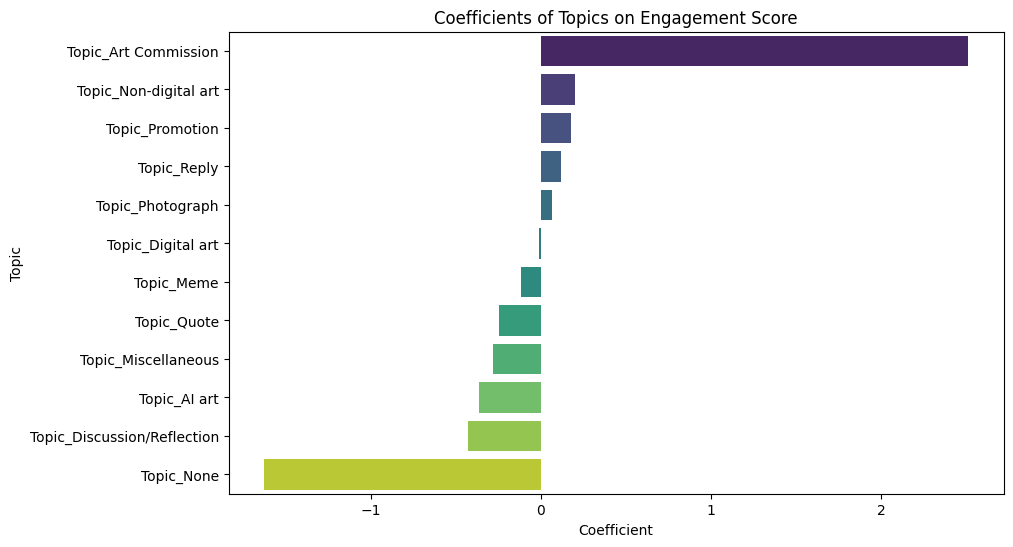

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv('All_Tweets_Transformed-Final.csv')

# Select relevant features
X = df[['Topic']]
y = df['Engagement Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('topic', OneHotEncoder(), ['Topic'])
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Extract coefficients and corresponding topics
coef = model.named_steps['regressor'].coef_
topics = model.named_steps['preprocessor'].named_transformers_['topic'].get_feature_names_out(input_features=['Topic'])

# Create a DataFrame to show coefficients for each topic
coefficients_df = pd.DataFrame({'Topic': topics, 'Coefficient': coef})

# Sort topics by coefficient magnitude
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Topic', data=coefficients_df, palette='viridis')
plt.title('Coefficients of Topics on Engagement Score')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load your dataset (replace 'All_Tweets_Featurized.csv' with your actual file path)
df = pd.read_csv('All_Tweets_Transformed-Final.csv')

# Drop rows with NaN values in the target variable
df_regression = df.dropna(subset=['Engagement Score'])

# Define features and target variable
features = ['Image Type', 'Text Sentiment', 'Topic', 'Word Count', 'Number of Hashtags', 'Quality of Image', 'Relevant Image', 'Face Presence', 'Colorfulness', 'Year', 'Month', 'Hour']
target = 'Engagement Score'

# Convert Timestamp to datetime
df_regression['Timestamp'] = pd.to_datetime(df_regression['Timestamp'])

# Extract Year, Month, and Hour
df_regression['Year'] = df_regression['Timestamp'].dt.year
df_regression['Month'] = df_regression['Timestamp'].dt.month
df_regression['Hour'] = df_regression['Timestamp'].dt.hour

# Separate features and target variable
X = df_regression[features]
y = df_regression[target]

numeric_features = ['Word Count', 'Number of Hashtags', 'Colorfulness', 'Year', 'Month', 'Hour']
categorical_features = ['Image Type', 'Text Sentiment', 'Topic', 'Quality of Image', 'Relevant Image', 'Face Presence']

# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Linear Regression pipeline
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', LinearRegression())])

# Random Forest Regressor pipeline
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', RandomForestRegressor())])

# SVM Regressor pipeline
pipeline_svm = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', SVR())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression Model
pipeline_lr.fit(X_train, y_train)

# Fit the Random Forest model
pipeline_rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pipeline_rf.named_steps['regressor'].feature_importances_

# Print feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

# Fit the SVM model
pipeline_svm.fit(X_train, y_train)

# Make predictions
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_svm = pipeline_svm.predict(X_test)


mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression Mean Squared Error: {mse_lr}")
# R-squared for Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression R-squared: {r2_lr}")


# Calculate mean squared error for Random Forest Regression
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Regression Mean Squared Error: {mse_rf}")
# R-squared for Random Forest Regression
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regression R-squared: {r2_rf}")

# Calculate mean squared error for SVM Regression
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f"SVM Regression Mean Squared Error: {mse_svm}")
# R-squared for SVM Regression
r2_svm = r2_score(y_test, y_pred_svm)
print(f"SVM Regression R-squared: {r2_svm}")


Image Type: 0.17069567963916657
Text Sentiment: 0.1300443897878597
Topic: 0.17034116658150847
Word Count: 0.0021197906705609257
Number of Hashtags: 0.07659676163099967
Quality of Image: 0.1770358026402148
Relevant Image: 0.004041286545458806
Face Presence: 0.009801705765184573
Colorfulness: 0.0036032804713961794
Year: 0.0017310392079689038
Month: 0.01339263814602837
Hour: 0.00644039040729807
Linear Regression Mean Squared Error: 4.6977062447727995
Linear Regression R-squared: 0.04528802373632601
Random Forest Regression Mean Squared Error: 3.748069720468981
Random Forest Regression R-squared: 0.23828207564391046
SVM Regression Mean Squared Error: 4.863733578058993
SVM Regression R-squared: 0.011546390007775131


<Figure size 1200x800 with 0 Axes>

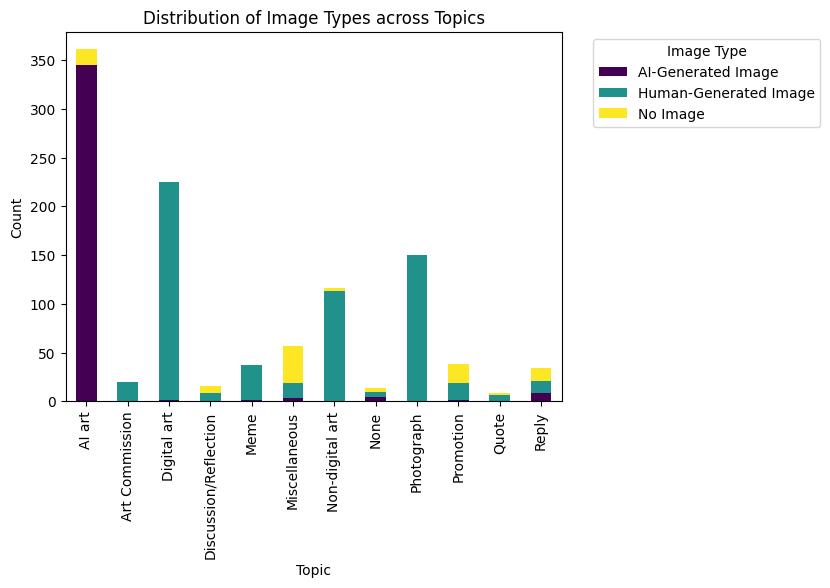

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv('All_Tweets_Transformed-Final.csv')

# Map Image Types to desired labels
image_type_mapping = {-1: 'No Image', 1: 'AI-Generated Image', 0: 'Human-Generated Image'}
df['Image Type Label'] = df['Image Type'].map(image_type_mapping)

# Create a DataFrame with the count of Image Types for each Topic
df_plot = df.groupby(['Topic', 'Image Type Label']).size().unstack(fill_value=0)

# Plot a stacked bar plot
plt.figure(figsize=(12, 8))
df_plot.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Image Types across Topics')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.legend(title='Image Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


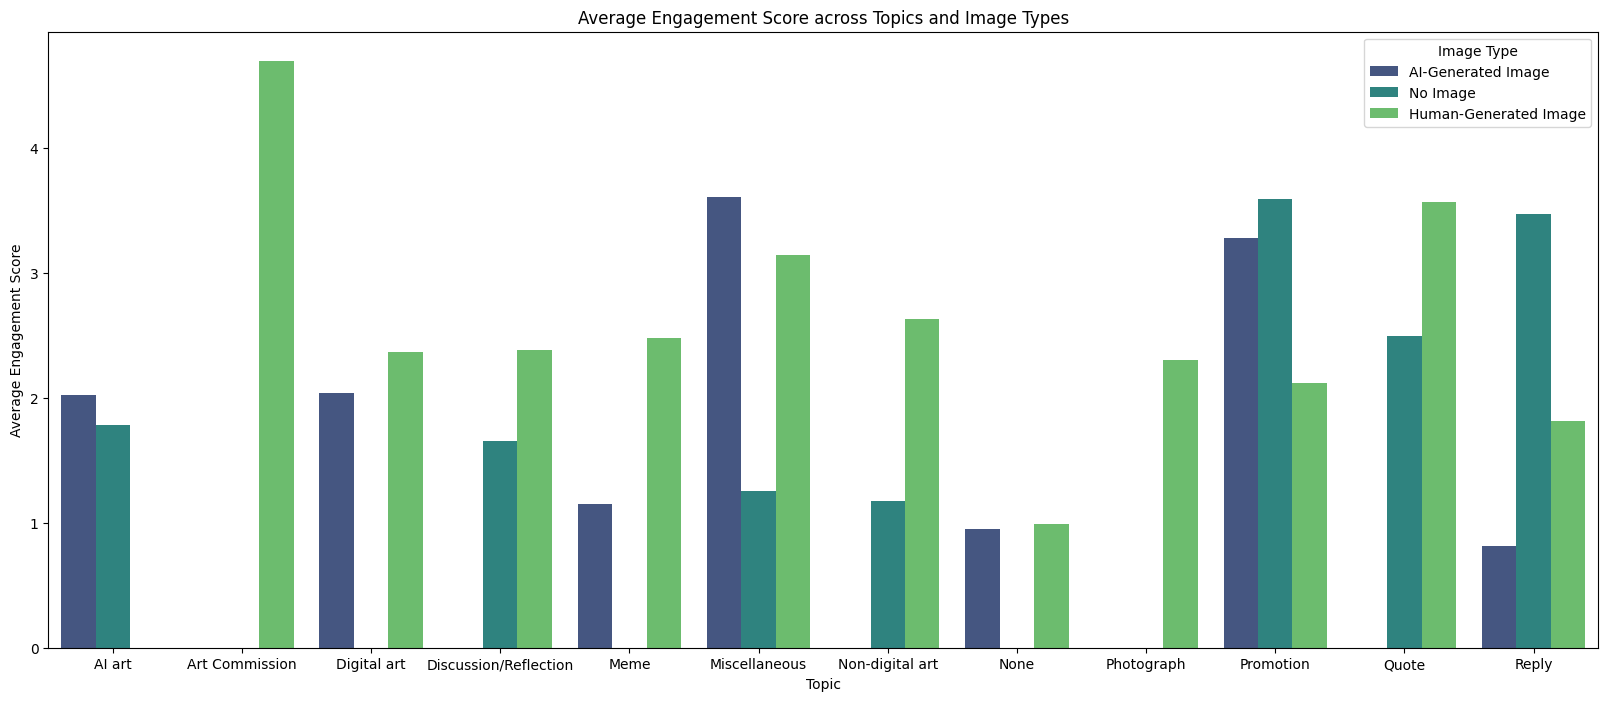

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv('All_Tweets_Transformed-Final.csv')

# Map Image Types to desired labels
image_type_mapping = {-1: 'No Image', 1: 'AI-Generated Image', 0: 'Human-Generated Image'}
df['Image Type Label'] = df['Image Type'].map(image_type_mapping)

# Calculate mean and standard deviation for each combination of Topic and Image Type
grouped_df = df.groupby(['Topic', 'Image Type Label'])['Engagement Score'].agg(['mean', 'std']).reset_index()

# Plot bar plot with error bars
plt.figure(figsize=(20, 8))
sns.barplot(x='Topic', y='mean', hue='Image Type Label', data=grouped_df, palette='viridis', errorbar='sd')
plt.title('Average Engagement Score across Topics and Image Types')
plt.xlabel('Topic')
plt.ylabel('Average Engagement Score')
plt.legend(title='Image Type')
plt.show()


## **Correlations**

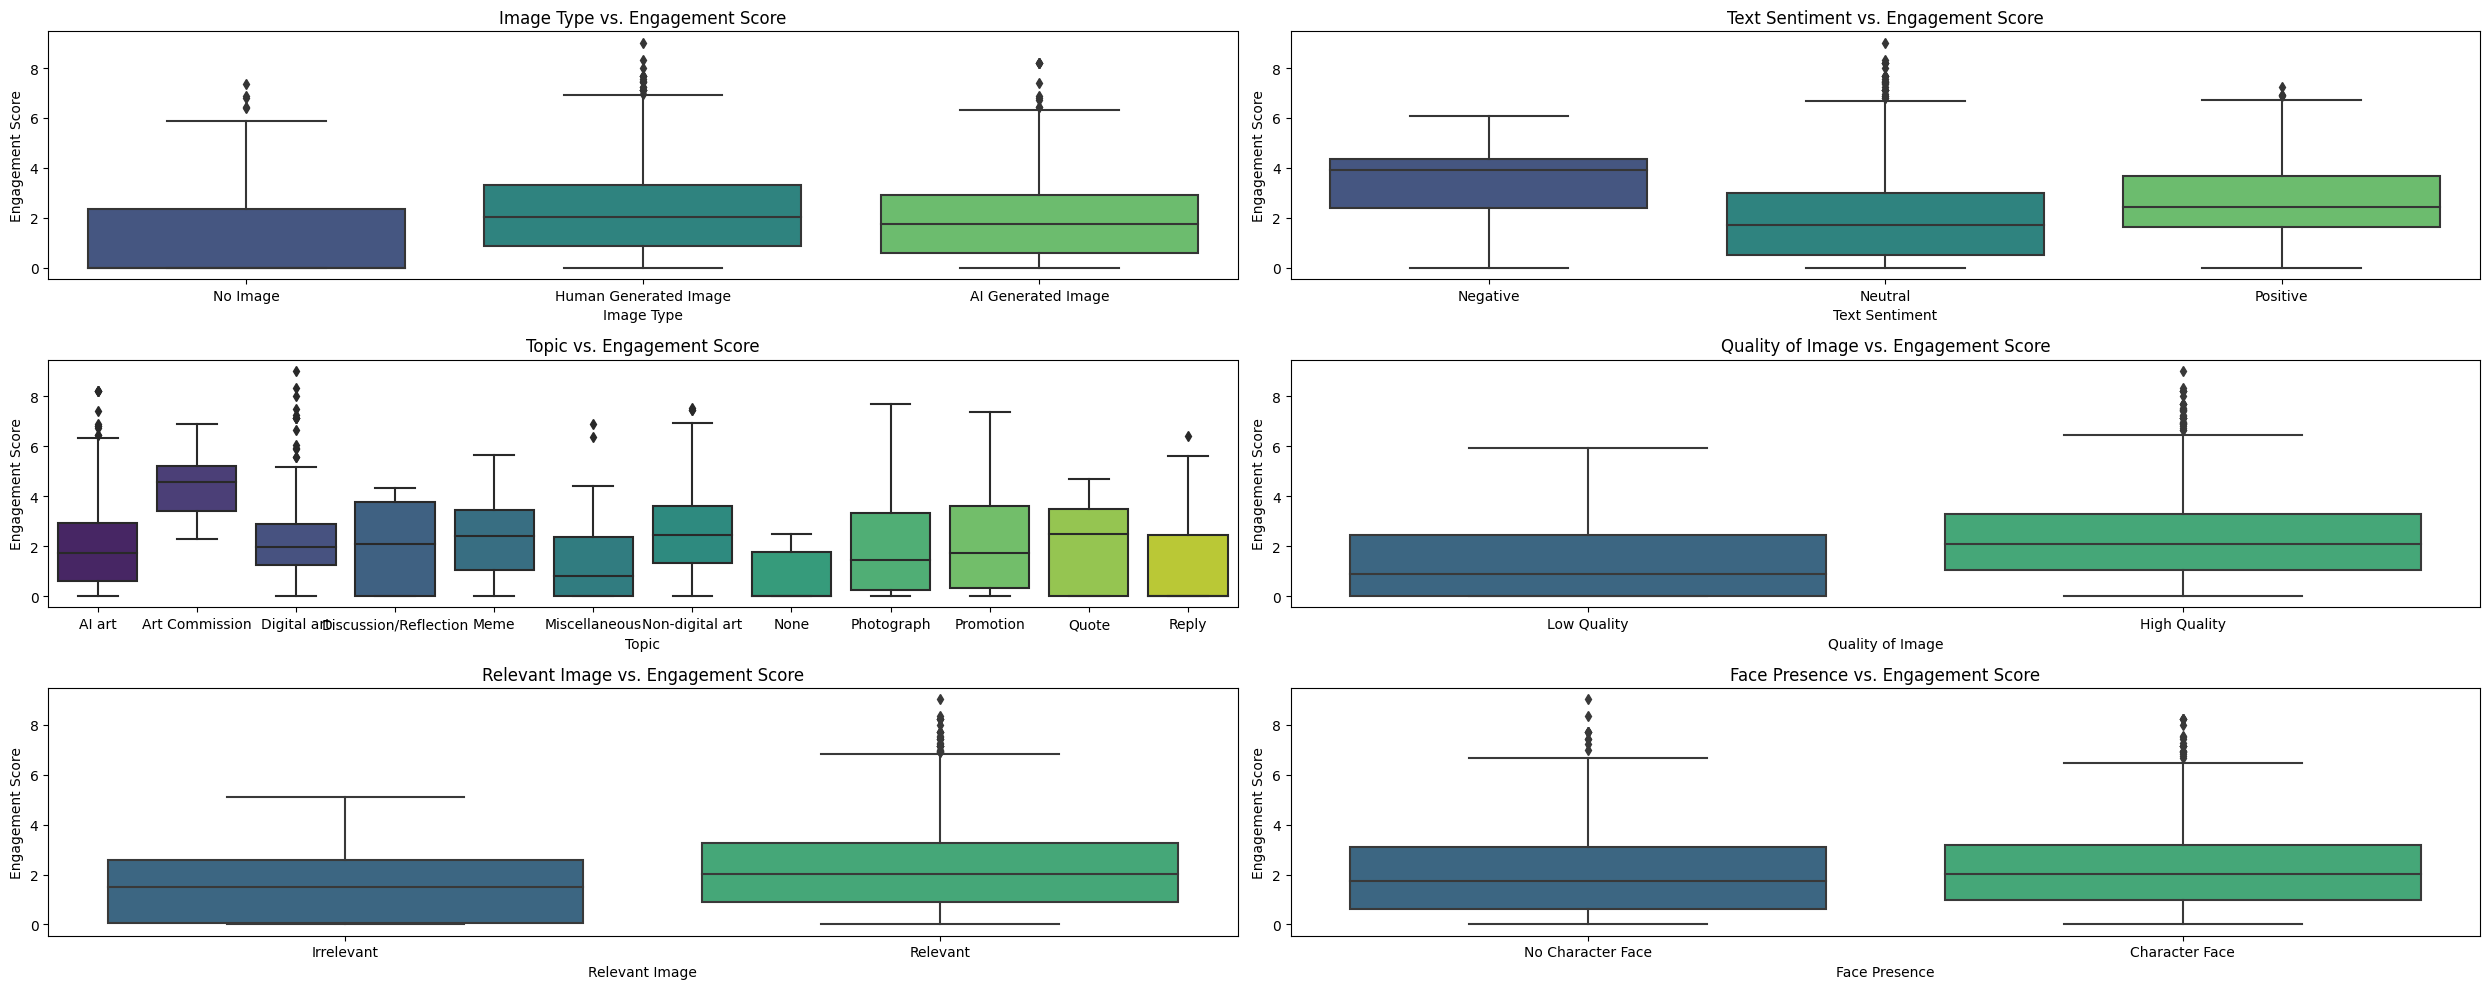

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore

df = pd.read_csv('All_Tweets_Transformed-Final.csv')

# Assuming df is your DataFrame with the 'Engagement Score' column
# Drop rows with NaN values in the target variable
df_regression = df.dropna(subset=['Engagement Score'])

# Define a z-score threshold (e.g., 3 for a standard threshold)
z_threshold = 3

# Calculate the z-scores for the 'Engagement Score' column
df_regression['Engagement Score Z-Score'] = zscore(df_regression['Engagement Score'])

# Filter out rows where the absolute z-score is greater than the threshold
df_filtered = df_regression[abs(df_regression['Engagement Score Z-Score']) <= z_threshold]

# Drop the z-score column if you don't need it anymore
df_filtered = df_filtered.drop(columns=['Engagement Score Z-Score'])

# Ensure that specified columns have integer values of 0, 1, and -1
integer_columns = ['Image Type', 'Text Sentiment', 'Quality of Image', 'Relevant Image', 'Face Presence']
df_filtered[integer_columns] = df_filtered[integer_columns].astype(int)

# Combine features and target variable for plotting
df_plot = df_filtered

# Create a separate dataframe for plotting without rows where Quality of Image, Relevant Image, and Face Presence are 0
df_plot_quality_relevant_face = df_plot[(df_plot['Quality of Image'] != 0) &
                                         (df_plot['Relevant Image'] != 0) &
                                         (df_plot['Face Presence'] != 0)]

categorical_features = ['Image Type', 'Text Sentiment', 'Topic', 'Quality of Image', 'Relevant Image', 'Face Presence']

# Define labels for x-axis variables
label_mapping = {
    'Image Type': {-1: 'No Image', 0: 'Human Generated Image', 1: 'AI Generated Image'},
    'Text Sentiment': {-1: 'Negative', 0: 'Neutral', 1: 'Positive'},
    'Quality of Image': {-1: 'Low Quality', 1: 'High Quality'},
    'Relevant Image': {-1: 'Irrelevant', 1: 'Relevant'},
    'Face Presence': {-1: 'No Character Face', 1: 'Character Face'}
}

# Plotting for each categorical variable
plt.figure(figsize=(25, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)

    # Use boxplot without 0 values for Quality of Image, Relevant Image, and Face Presence
    if feature in ['Quality of Image', 'Relevant Image', 'Face Presence']:
        sns.boxplot(x=feature, y='Engagement Score', data=df_plot_quality_relevant_face, palette='viridis', order=sorted(df_plot_quality_relevant_face[feature].unique()))
    else:
        sns.boxplot(x=feature, y='Engagement Score', data=df_plot, palette='viridis', order=sorted(df_plot[feature].unique()))

    plt.title(f'{feature} vs. Engagement Score')
    plt.xlabel(feature)  # Set x-axis label

    # Set x-axis labels based on the defined mapping
    if feature in label_mapping:
      if feature in ['Quality of Image', 'Relevant Image', 'Face Presence']:
        ticks_labels = [label_mapping[feature].get(val, val) for val in sorted(df_plot[feature].unique()) if val != 0]
      else:
        ticks_labels = [label_mapping[feature].get(val, val) for val in sorted(df_plot[feature].unique())]
      plt.xticks(ticks=range(len(ticks_labels)), labels=ticks_labels)

plt.tight_layout()
plt.show()


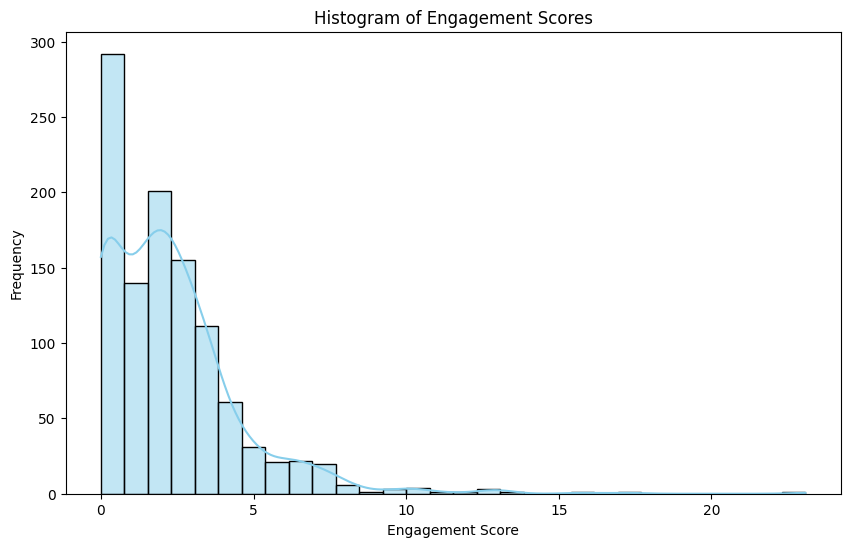

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with the 'Engagement Score' column
# Drop rows with NaN values in the target variable
df_regression = df.dropna(subset=['Engagement Score'])

# Define the number of bins for the histogram
num_bins = 30

# Create the histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df_regression['Engagement Score'], bins=num_bins, kde=True, color='skyblue')

plt.title('Histogram of Engagement Scores')
plt.xlabel('Engagement Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your dataset (replace 'All_Tweets_Transformed-Final.csv' with your actual file path)
df = pd.read_csv('All_Tweets_Transformed-Final.csv')

# Drop rows with NaN values in the target variable
df_regression = df.dropna(subset=['Engagement Score'])

# Define features and target variable
features = ['Image Type', 'Topic', 'Text Sentiment', 'Word Count', 'Number of Hashtags', 'Quality of Image', 'Relevant Image', 'Face Presence', 'Colorfulness']
target = 'Engagement Score'

# Use LabelEncoder for the 'Topic' variable
label_encoder = LabelEncoder()
df_regression['Topic'] = label_encoder.fit_transform(df_regression['Topic'])
# Take a random sample of 500
df_sample = resample(df_regression, n_samples=700, random_state=42)

# Separate features and target variable for the sample
X = df_sample[features]
y = df_sample[target]

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_standardized)

# Access the loadings for each principal component
loadings = pca.components_

# Create a DataFrame for better visualization
loadings_df = pd.DataFrame(loadings, columns=features)
loadings_df.index = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3']

print("Loadings:")
print(loadings_df)
print("Variance explained: ", pca.explained_variance_ratio_)

'''# Create a DataFrame with the reduced dimensions and the target variable
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Engagement_Score'] = y.values

# Scatterplot
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], c=df_pca['Engagement_Score'], cmap='viridis', alpha=0.5)
plt.title('2D Scatterplot of Principal Components vs. Engagement Score')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Engagement Score')
plt.show()'''


Loadings:
                       Image Type     Topic  Text Sentiment  Word Count  \
Principal Component 1    0.317181 -0.246106       -0.160469   -0.286275   
Principal Component 2   -0.524044  0.512054        0.000190    0.013854   
Principal Component 3    0.103458 -0.080741        0.732453    0.587717   

                       Number of Hashtags  Quality of Image  Relevant Image  \
Principal Component 1            0.532185         -0.369258       -0.372902   
Principal Component 2            0.011467         -0.354828       -0.394595   
Principal Component 3            0.120843         -0.050390       -0.107126   

                       Face Presence  Colorfulness  
Principal Component 1      -0.299579      0.287659  
Principal Component 2      -0.314965     -0.286434  
Principal Component 3      -0.220957      0.153095  
Variance explained:  [0.2550305  0.21271828 0.11952968]


"# Create a DataFrame with the reduced dimensions and the target variable\ndf_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])\ndf_pca['Engagement_Score'] = y.values\n\n# Scatterplot\nplt.figure(figsize=(10, 8))\nplt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], c=df_pca['Engagement_Score'], cmap='viridis', alpha=0.5)\nplt.title('2D Scatterplot of Principal Components vs. Engagement Score')\nplt.xlabel('Principal Component 1')\nplt.ylabel('Principal Component 2')\nplt.colorbar(label='Engagement Score')\nplt.show()"

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:       Engagement Score   No. Observations:                  560
Model:                            GLM   Df Residuals:                      549
Model Family:        NegativeBinomial   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1279.8
Date:                Tue, 28 Nov 2023   Deviance:                       714.19
Time:                        14:41:06   Pearson chi2:                 1.92e+03
No. Iterations:                   100   Pseudo R-squ. (CS):            -0.5732
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2127      0.087     -2.437      0.0

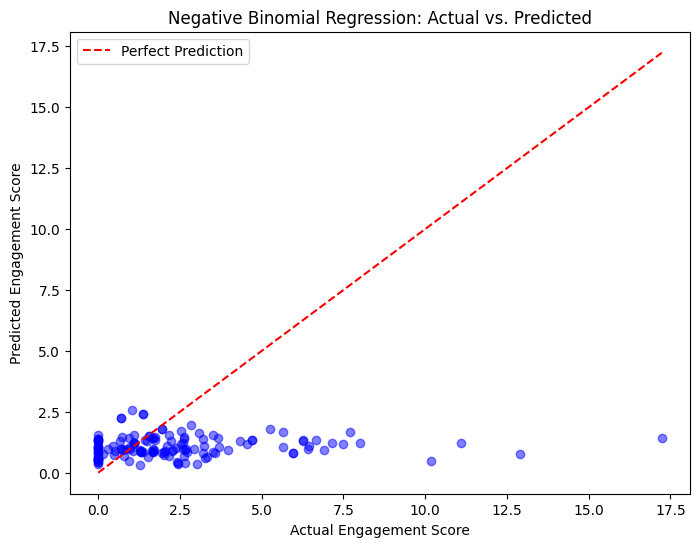

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your dataset (replace 'All_Tweets_Transformed-Final.csv' with your actual file path)
df = pd.read_csv('All_Tweets_Transformed-Final.csv')

# Drop rows with NaN values in the target variable
df_regression = df.dropna(subset=['Engagement Score'])

# Extract month and hour from the timestamp
df_regression['Timestamp'] = pd.to_datetime(df_regression['Timestamp'])
df_regression['Month'] = df_regression['Timestamp'].dt.month
df_regression['Hour'] = df_regression['Timestamp'].dt.hour

# Define features and target variable
features = ['Image Type', 'Topic', 'Text Sentiment', 'Word Count', 'Number of Hashtags', 'Quality of Image', 'Relevant Image', 'Face Presence', 'Colorfulness', 'Month', 'Hour']
target = 'Engagement Score'

# Use LabelEncoder for the 'Topic' variable
label_encoder = LabelEncoder()
df_regression['Topic'] = label_encoder.fit_transform(df_regression['Topic'])

# Separate features and target variable
X = df_regression[features]
y = df_regression[target]

# Take a random sample of 500
df_sample = resample(df_regression, n_samples=700, random_state=42)

# Separate features and target variable for the sample
X_sample = df_sample[features]
y_sample = df_sample[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Add a constant term to the features matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Fit a Negative Binomial regression model
neg_binomial_model = sm.GLM(y_train, X_train_scaled, family=sm.families.NegativeBinomial()).fit()

# Evaluate the model on the test set

y_pred = neg_binomial_model.predict(X_test_scaled)

# Display the summary of the model
print(neg_binomial_model.summary())

# Scatter plot of predicted vs. actual engagement scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Negative Binomial Regression: Actual vs. Predicted')
plt.xlabel('Actual Engagement Score')
plt.ylabel('Predicted Engagement Score')
plt.legend()
plt.show()



In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample  # Import resample for random sampling

# Load your dataset (replace 'All_Tweets_Transformed-Final.csv' with your actual file path)
df = pd.read_csv('All_Tweets_Transformed-Final.csv')

# Drop rows with NaN values in the target variable
df_regression = df.dropna(subset=['Engagement Score'])

# Extract month and hour from the timestamp
df_regression['Timestamp'] = pd.to_datetime(df_regression['Timestamp'])
df_regression['Month'] = df_regression['Timestamp'].dt.month
df_regression['Hour'] = df_regression['Timestamp'].dt.hour

# Define features and target variable
features = ['Image Type', 'Topic', 'Text Sentiment', 'Word Count', 'Number of Hashtags', 'Quality of Image', 'Relevant Image', 'Face Presence', 'Colorfulness', 'Month', 'Hour']
target = 'Engagement Score'

# Use LabelEncoder for the 'Topic' variable
label_encoder = LabelEncoder()
df_regression['Topic'] = label_encoder.fit_transform(df_regression['Topic'])

# Separate features and target variable
X = df_regression[features]
y = df_regression[target]

# Take a random sample of 700
df_sample = resample(df_regression, n_samples=700, random_state=42)

# Separate features and target variable for the sample
X_sample = df_sample[features]
y_sample = df_sample[target]

# Split the data into training and testing sets for the sample
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Add a constant term to the features matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Fit a Negative Binomial regression model
neg_binomial_model = sm.GLM(y_train, sm.add_constant(X_train_scaled), family=sm.families.NegativeBinomial()).fit()

# Evaluate the model on the test set
y_pred = neg_binomial_model.predict(sm.add_constant(X_test_scaled))

# Display the summary of the model
print(neg_binomial_model.summary())

# Calculate AIC and BIC
aic = neg_binomial_model.aic
bic = neg_binomial_model.bic

print(f'AIC: {aic}')
print(f'BIC: {bic}')


                 Generalized Linear Model Regression Results                  
Dep. Variable:       Engagement Score   No. Observations:                  560
Model:                            GLM   Df Residuals:                      548
Model Family:        NegativeBinomial   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1136.6
Date:                Tue, 28 Nov 2023   Deviance:                       427.84
Time:                        16:44:16   Pearson chi2:                     386.
No. Iterations:                     8   Pseudo R-squ. (CS):            0.05657
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8320      0.051     16.314      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1838: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


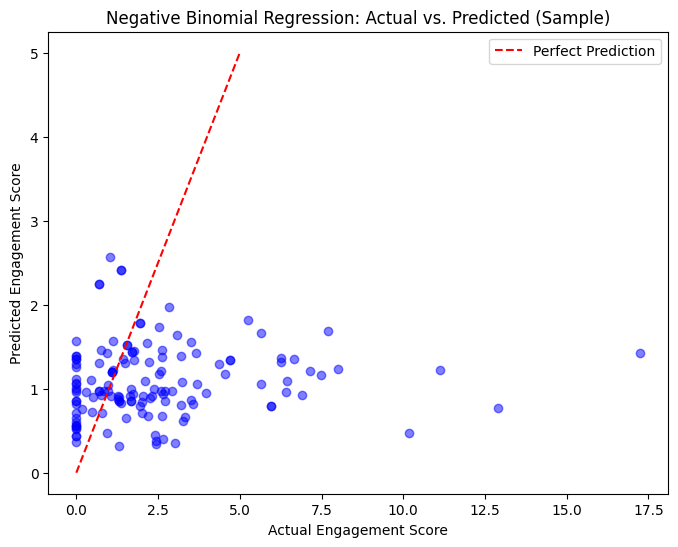

In [ ]:
# Scatter plot of predicted vs. actual engagement scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), 5], [min(y_test), 5], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Negative Binomial Regression: Actual vs. Predicted (Sample)')
plt.xlabel('Actual Engagement Score')
plt.ylabel('Predicted Engagement Score')
plt.legend()
plt.show()

In [ ]:
# checking for multicollinearity, which there isn't any judging by the results
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_train is your feature matrix
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif)


             Variable        VIF
0               const  12.261552
1          Image_Type   1.954209
2               Topic   1.666343
3      Text_Sentiment   1.066857
4          Word_Count   1.133397
5  Number_of_Hashtags   1.734991
6    Quality_of_Image   1.522872
7      Relevant_Image   1.673114
8       Face_Presence   1.242679
9        Colorfulness   1.284828


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1838: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Binary Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:       Engagement Score   No. Observations:                  861
Model:                            GLM   Df Residuals:                      849
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -379.18
Date:                Tue, 28 Nov 2023   Deviance:                       758.36
Time:                        16:47:24   Pearson chi2:                     839.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.09791
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5957      0.0

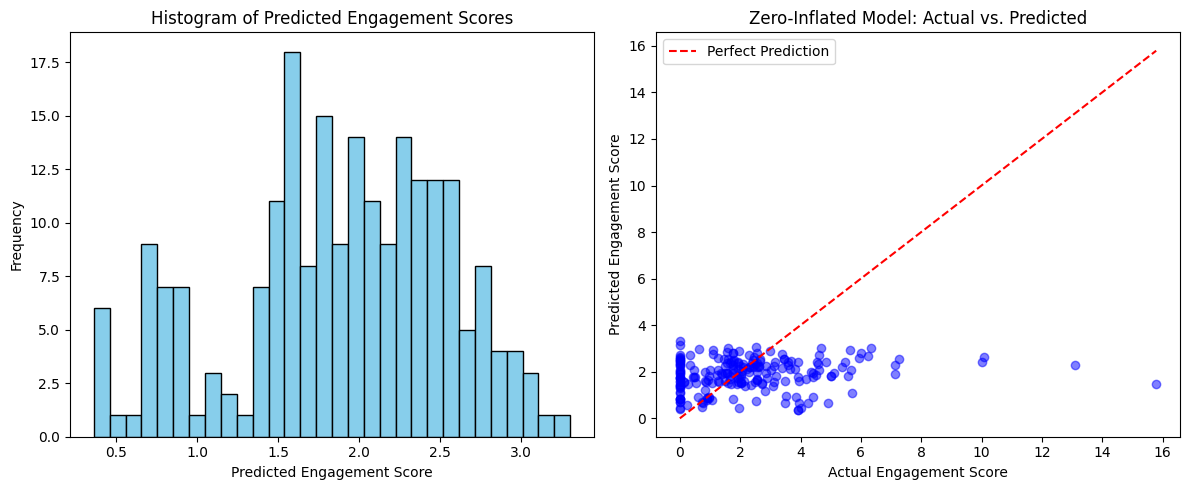

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load your dataset (replace 'All_Tweets_Transformed-Final.csv' with your actual file path)
df = pd.read_csv('All_Tweets_Transformed-Final.csv')

# Drop rows with NaN values in the target variable
df_regression = df.dropna(subset=['Engagement Score'])

# Extract month and hour from the timestamp
df_regression['Timestamp'] = pd.to_datetime(df_regression['Timestamp'])
df_regression['Month'] = df_regression['Timestamp'].dt.month
df_regression['Hour'] = df_regression['Timestamp'].dt.hour

# Define features and target variable
features = ['Image Type', 'Topic', 'Text Sentiment', 'Word Count', 'Number of Hashtags', 'Quality of Image', 'Relevant Image', 'Face Presence', 'Colorfulness', 'Month', 'Hour']
target = 'Engagement Score'

# Use LabelEncoder for the 'Topic' variable
label_encoder = LabelEncoder()
df_regression['Topic'] = label_encoder.fit_transform(df_regression['Topic'])

# Separate features and target variable
X = df_regression[features]
y = df_regression[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term to the features matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Create binary outcome indicating excess zeros
y_binary_train = (y_train == 0).astype(int)
y_binary_test = (y_test == 0).astype(int)

# Fit binary model for excess zeros
binary_model = sm.GLM(y_binary_train, sm.add_constant(X_train_scaled), family=sm.families.Binomial())
binary_results = binary_model.fit()

# Predict probabilities of excess zeros on the test set
prob_excess_zeros = binary_results.predict(sm.add_constant(X_test_scaled))

# Fit negative binomial model for count part
count_model = sm.GLM(y_train, sm.add_constant(X_train_scaled), family=sm.families.NegativeBinomial())
count_results = count_model.fit()

# Predict counts on the test set
count_pred = count_results.predict(sm.add_constant(X_test_scaled))

# Combine predictions
y_pred = (1 - prob_excess_zeros) * count_pred

# Display the summary of the models
print("Binary Model Summary:")
print(binary_results.summary())

print("\nNegative Binomial Model Summary:")
print(count_results.summary())

# Calculate AIC and BIC
aic = count_results.aic
bic = count_results.bic

print(f'AIC: {aic}')
print(f'BIC: {bic}')
# Scatter plot of predicted vs. actual engagement scores
plt.figure(figsize=(12, 5))

# Histogram of predicted values
plt.subplot(1, 2, 1)
plt.hist(y_pred, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Predicted Engagement Scores')
plt.xlabel('Predicted Engagement Score')
plt.ylabel('Frequency')

# Scatter plot of predicted vs. actual engagement scores
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Zero-Inflated Model: Actual vs. Predicted')
plt.xlabel('Actual Engagement Score')
plt.ylabel('Predicted Engagement Score')
plt.legend()

plt.tight_layout()
plt.show()
